Problem Statement: 
A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 


In [2]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#Importing required packages.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
dl=pd.read_csv(r"/content/Data file.csv")

In [8]:
dl.head(6)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
5,6,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,...,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,2016-07-02


##### here label is the target and all other are features.label has categorical data so this is classification problem.

In [9]:
dl.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [10]:
dl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

here only 3 object type data and all other are numerical data.

In [11]:
dl.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

##### see there is no null value are present...

In [12]:
dl.shape

(209593, 37)

### data cleaning

In [13]:
dl.describe(include='all')

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
count,209593.000000,209593.000000,209593,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593,209593
unique,NaN,NaN,186243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,82
top,NaN,NaN,04581I85330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UPW,2016-07-04
freq,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209593,3150
mean,104797.000000,0.875177,NaN,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,NaN,NaN
std,60504.431823,0.330519,NaN,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,NaN,NaN
min,1.000000,0.000000,NaN,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,52399.000000,1.000000,NaN,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,104797.000000,1.000000,NaN,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,NaN,NaN
75%,157195.000000,1.000000,NaN,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,NaN,NaN


In [14]:
dl.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

In [15]:
dl.drop('Unnamed: 0',axis=1,inplace=True)

In [17]:
dl.shape

(209593, 36)

In [18]:
dl.duplicated(keep='first').sum()

1

In [19]:
dl.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [20]:
dl['label'].nunique()

2

### Visualization of data

## EDA

UPW    209593
Name: pcircle, dtype: int64


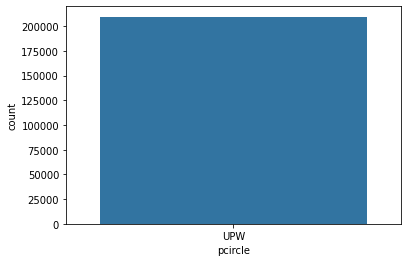

In [21]:
ax= sns.countplot(x='pcircle',data=dl)
print(dl["pcircle"].value_counts())

In [22]:
nominal_data=dl[['label', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90',]].copy()

[link text](https:// [link text](https:// [link text](https:// [link text](https://))))### Scatter plot

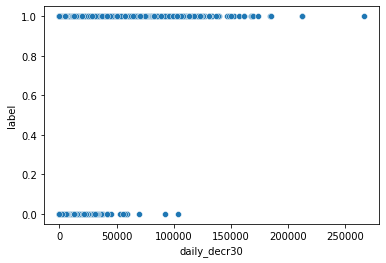

In [23]:
sns.scatterplot()
sns.scatterplot(x="daily_decr30", y="label", data= dl)

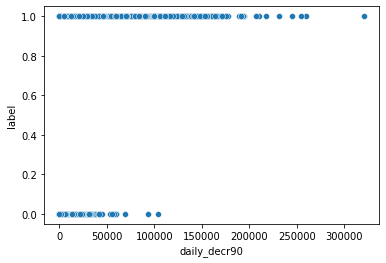

In [24]:
sns.scatterplot()
sns.scatterplot(x="daily_decr90", y="label", data= dl)

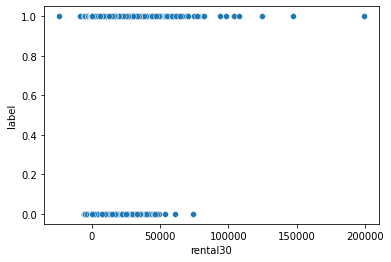

In [25]:
sns.scatterplot(x="rental30", y="label", data= dl)

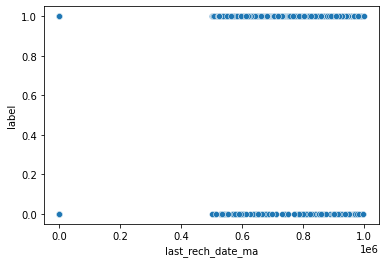

In [26]:
sns.scatterplot(x="last_rech_date_ma", y="label", data= dl)

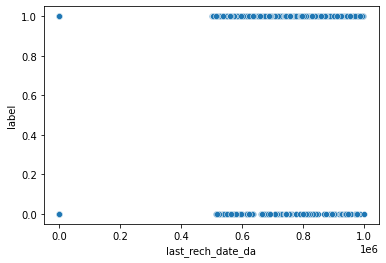

In [27]:
sns.scatterplot(x="last_rech_date_da", y="label", data= dl)

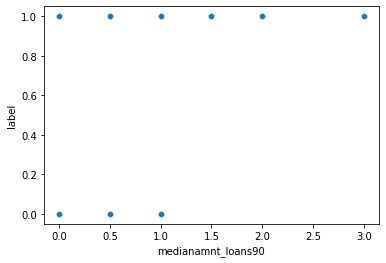

In [28]:
sns.scatterplot(x="medianamnt_loans90", y="label", data= dl)

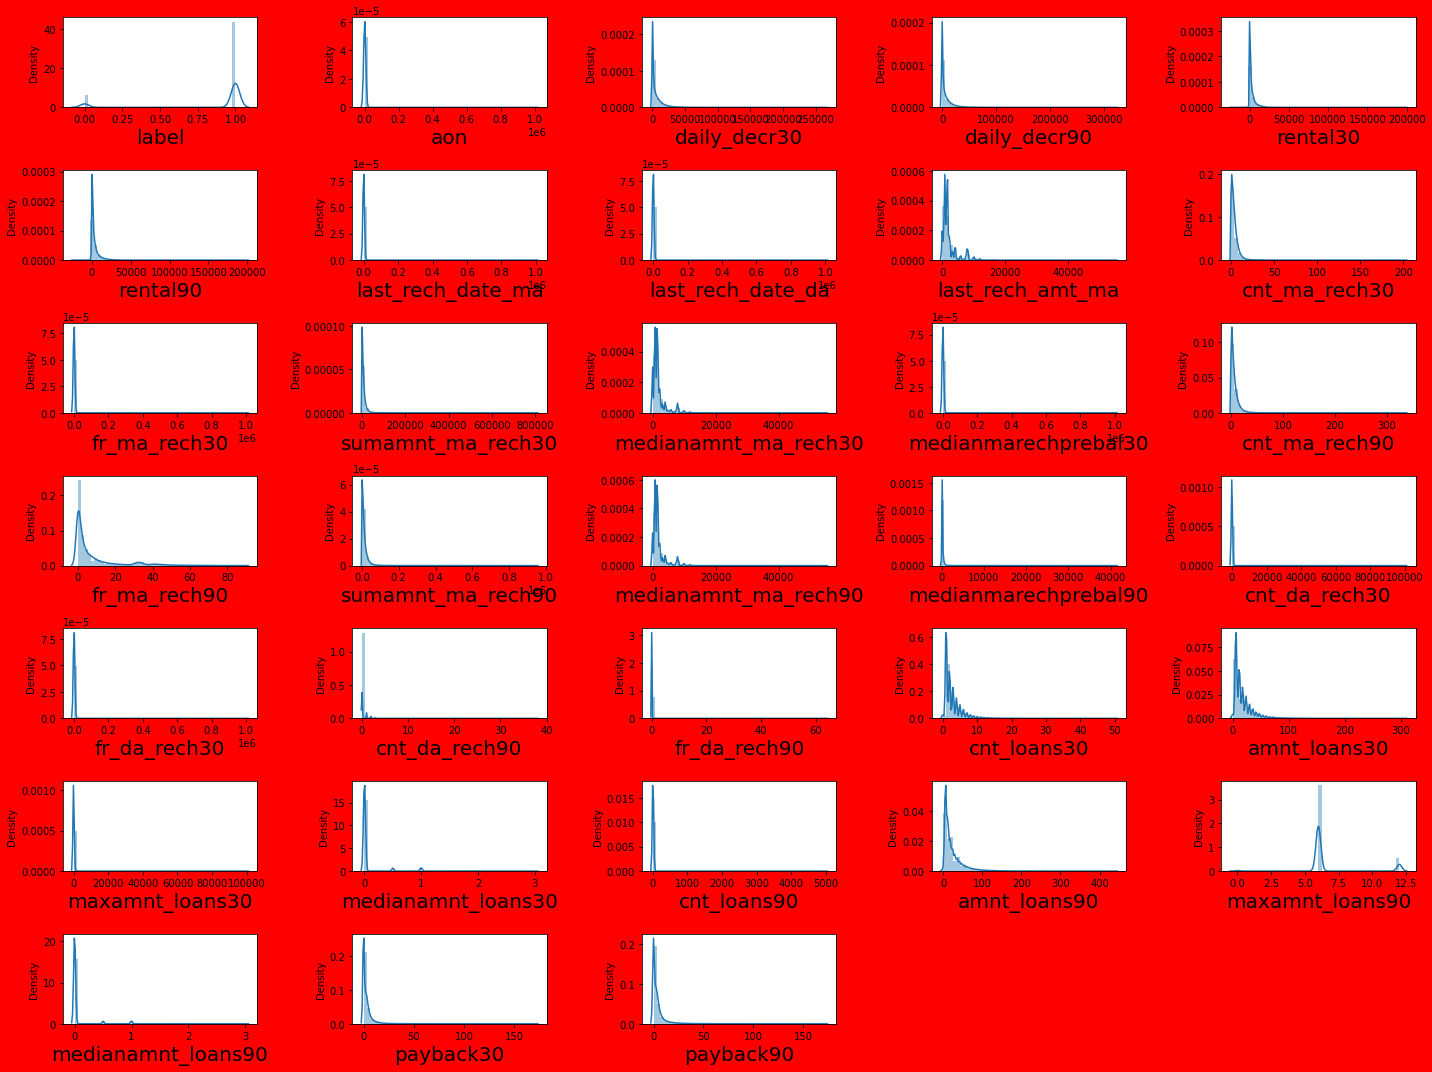

In [29]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in nominal_data:
    if plotnumber<=35:
        ax = plt.subplot(7,5,plotnumber)
        sns.distplot(nominal_data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [30]:
dl.drop(['msisdn','pdate'],axis=1,inplace=True)

In [31]:
dl[dl.notnull()].count()

label                   209593
aon                     209593
daily_decr30            209593
daily_decr90            209593
rental30                209593
rental90                209593
last_rech_date_ma       209593
last_rech_date_da       209593
last_rech_amt_ma        209593
cnt_ma_rech30           209593
fr_ma_rech30            209593
sumamnt_ma_rech30       209593
medianamnt_ma_rech30    209593
medianmarechprebal30    209593
cnt_ma_rech90           209593
fr_ma_rech90            209593
sumamnt_ma_rech90       209593
medianamnt_ma_rech90    209593
medianmarechprebal90    209593
cnt_da_rech30           209593
fr_da_rech30            209593
cnt_da_rech90           209593
fr_da_rech90            209593
cnt_loans30             209593
amnt_loans30            209593
maxamnt_loans30         209593
medianamnt_loans30      209593
cnt_loans90             209593
amnt_loans90            209593
maxamnt_loans90         209593
medianamnt_loans90      209593
payback30               209593
payback9

In [32]:
#data['daily_decr30']=data['daily_decr30'].fillna(0.0)
#data['daily_decr90']=data['daily_decr90'].fillna(0.0)
#data['rental30']=data['rental30'].fillna(0.0)
#data['aon']=data['aon'].fillna(0.0)
#data['label']=data['label'].fillna(0.0)

In [33]:
dl[dl.notnull()].count()


label                   209593
aon                     209593
daily_decr30            209593
daily_decr90            209593
rental30                209593
rental90                209593
last_rech_date_ma       209593
last_rech_date_da       209593
last_rech_amt_ma        209593
cnt_ma_rech30           209593
fr_ma_rech30            209593
sumamnt_ma_rech30       209593
medianamnt_ma_rech30    209593
medianmarechprebal30    209593
cnt_ma_rech90           209593
fr_ma_rech90            209593
sumamnt_ma_rech90       209593
medianamnt_ma_rech90    209593
medianmarechprebal90    209593
cnt_da_rech30           209593
fr_da_rech30            209593
cnt_da_rech90           209593
fr_da_rech90            209593
cnt_loans30             209593
amnt_loans30            209593
maxamnt_loans30         209593
medianamnt_loans30      209593
cnt_loans90             209593
amnt_loans90            209593
maxamnt_loans90         209593
medianamnt_loans90      209593
payback30               209593
payback9

## related with target column

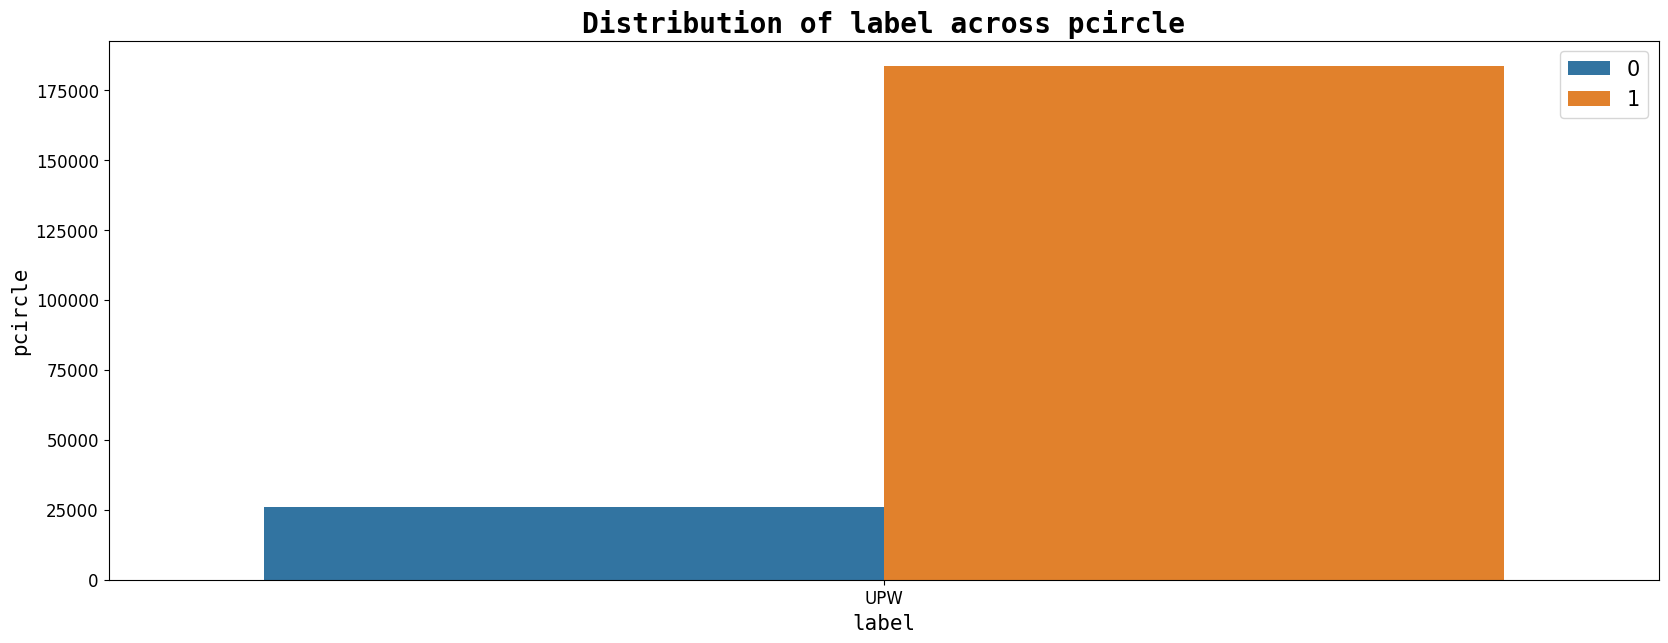

In [36]:
# Creating a countplot of label across pcircle
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(dl['pcircle'], hue=dl['label'])
plt.title('Distribution of label across pcircle', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('label', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('pcircle', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

# Encoding dataframe

In [37]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [38]:
for i in dl.columns:
    if dl[i].dtypes=="object":
        dl[i]=enc.fit_transform(dl[i].values.reshape(-1,1))

In [39]:
dl

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0.0
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0.0
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0.0
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0.0
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,0.0
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,0.0
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,0.0
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,0.0


In [40]:
dl.duplicated(subset = None, keep = 'first')

0         False
1         False
2         False
3         False
4         False
          ...  
209588    False
209589    False
209590    False
209591    False
209592    False
Length: 209593, dtype: bool

In [41]:
dl[dl.isna().any(axis=1)]

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle


In [42]:
dl.dropna

<bound method DataFrame.dropna of         label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0       

In [43]:
dl

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0.0
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0.0
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0.0
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0.0
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,0.0
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,0.0
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,0.0
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,0.0


# checking the data imbalance

In [44]:
# Checking the counts of label categories
LB = dl['label'].value_counts(normalize=True)
round(LB * 100, 2).astype('str') + ' %'

1    87.52 %
0    12.48 %
Name: label, dtype: object

### the dataset is imbalanced 87.52% of label-1 and 12.48% of label-0

# Heat Map

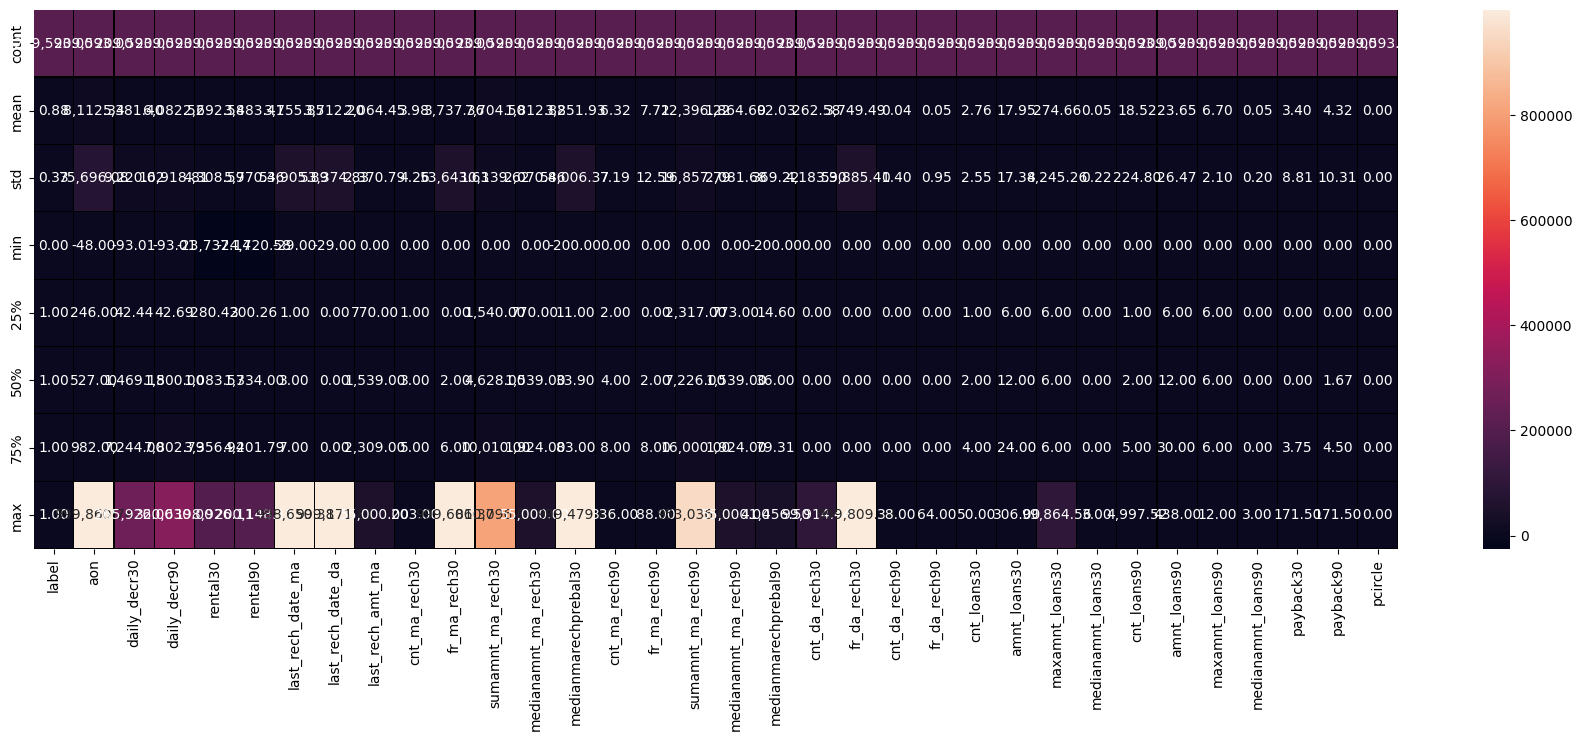

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(dl.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0,.2f")


### Correlation between target and features

In [46]:
dl.corr()['label'].sort_values()

fr_da_rech90           -0.005418
medianmarechprebal30   -0.004829
aon                    -0.003785
fr_da_rech30           -0.000027
maxamnt_loans30         0.000248
fr_ma_rech30            0.001330
last_rech_date_da       0.001711
cnt_da_rech90           0.002999
last_rech_date_ma       0.003728
cnt_da_rech30           0.003827
cnt_loans90             0.004733
medianamnt_loans90      0.035747
medianmarechprebal90    0.039300
medianamnt_loans30      0.044589
payback30               0.048336
payback90               0.049183
rental30                0.058085
rental90                0.075521
maxamnt_loans90         0.084144
fr_ma_rech90            0.084385
medianamnt_ma_rech90    0.120855
last_rech_amt_ma        0.131804
medianamnt_ma_rech30    0.141490
daily_decr90            0.166150
daily_decr30            0.168298
cnt_loans30             0.196283
amnt_loans30            0.197272
amnt_loans90            0.199788
sumamnt_ma_rech30       0.202828
sumamnt_ma_rech90       0.205793
cnt_ma_rec

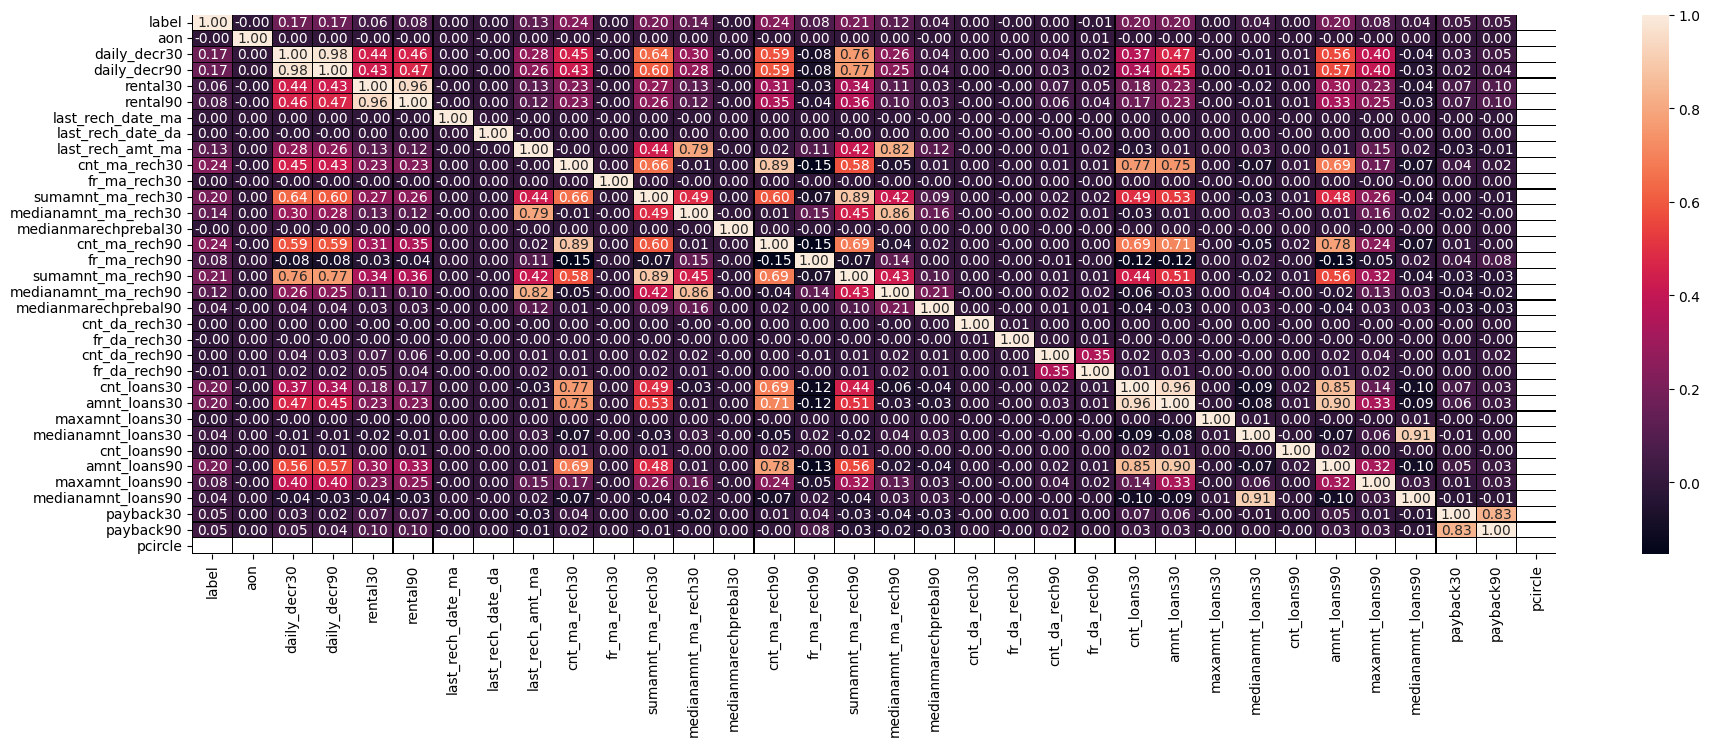

In [47]:
plt.figure(figsize=(22,7))
sns.heatmap(dl.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0,.2f")


here no any features are highly correlated to target but feature to features highly correlated.so we use vif factor then delete unwanted columns.

Line plot for show correlation + and -

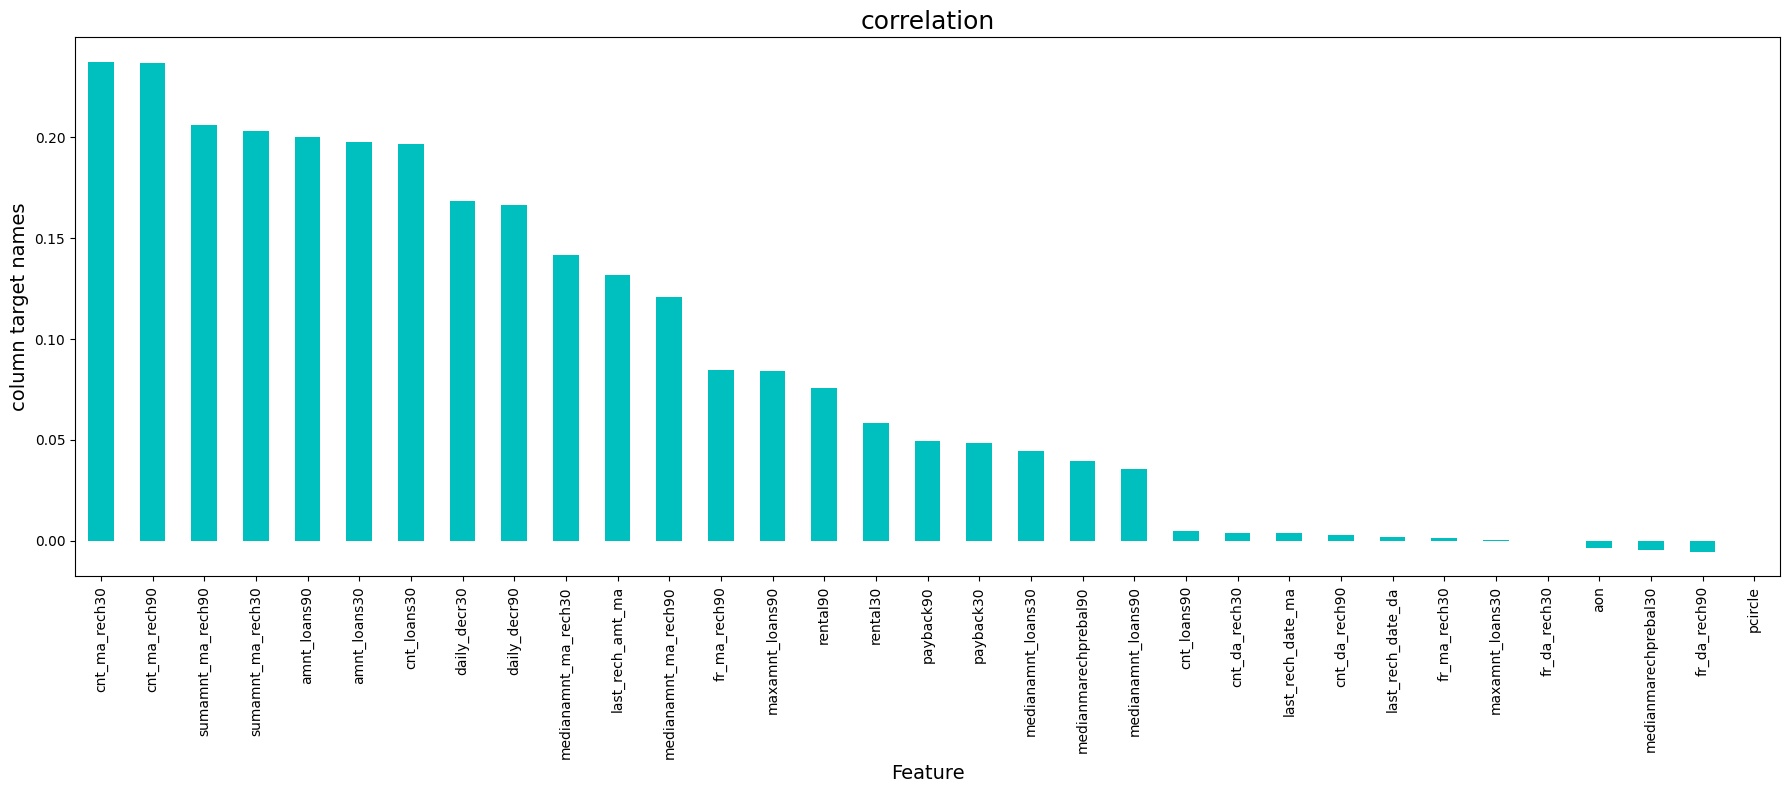

In [48]:
plt.figure(figsize=(22,7))
dl.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

drop the column which is not related to features and as per as target.

In [49]:
dl.drop(['maxamnt_loans30','fr_da_rech30','pcircle'],axis=1,inplace=True)

# check skewness and outliers

In [50]:
dl.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loans90       4.895720
payback30     

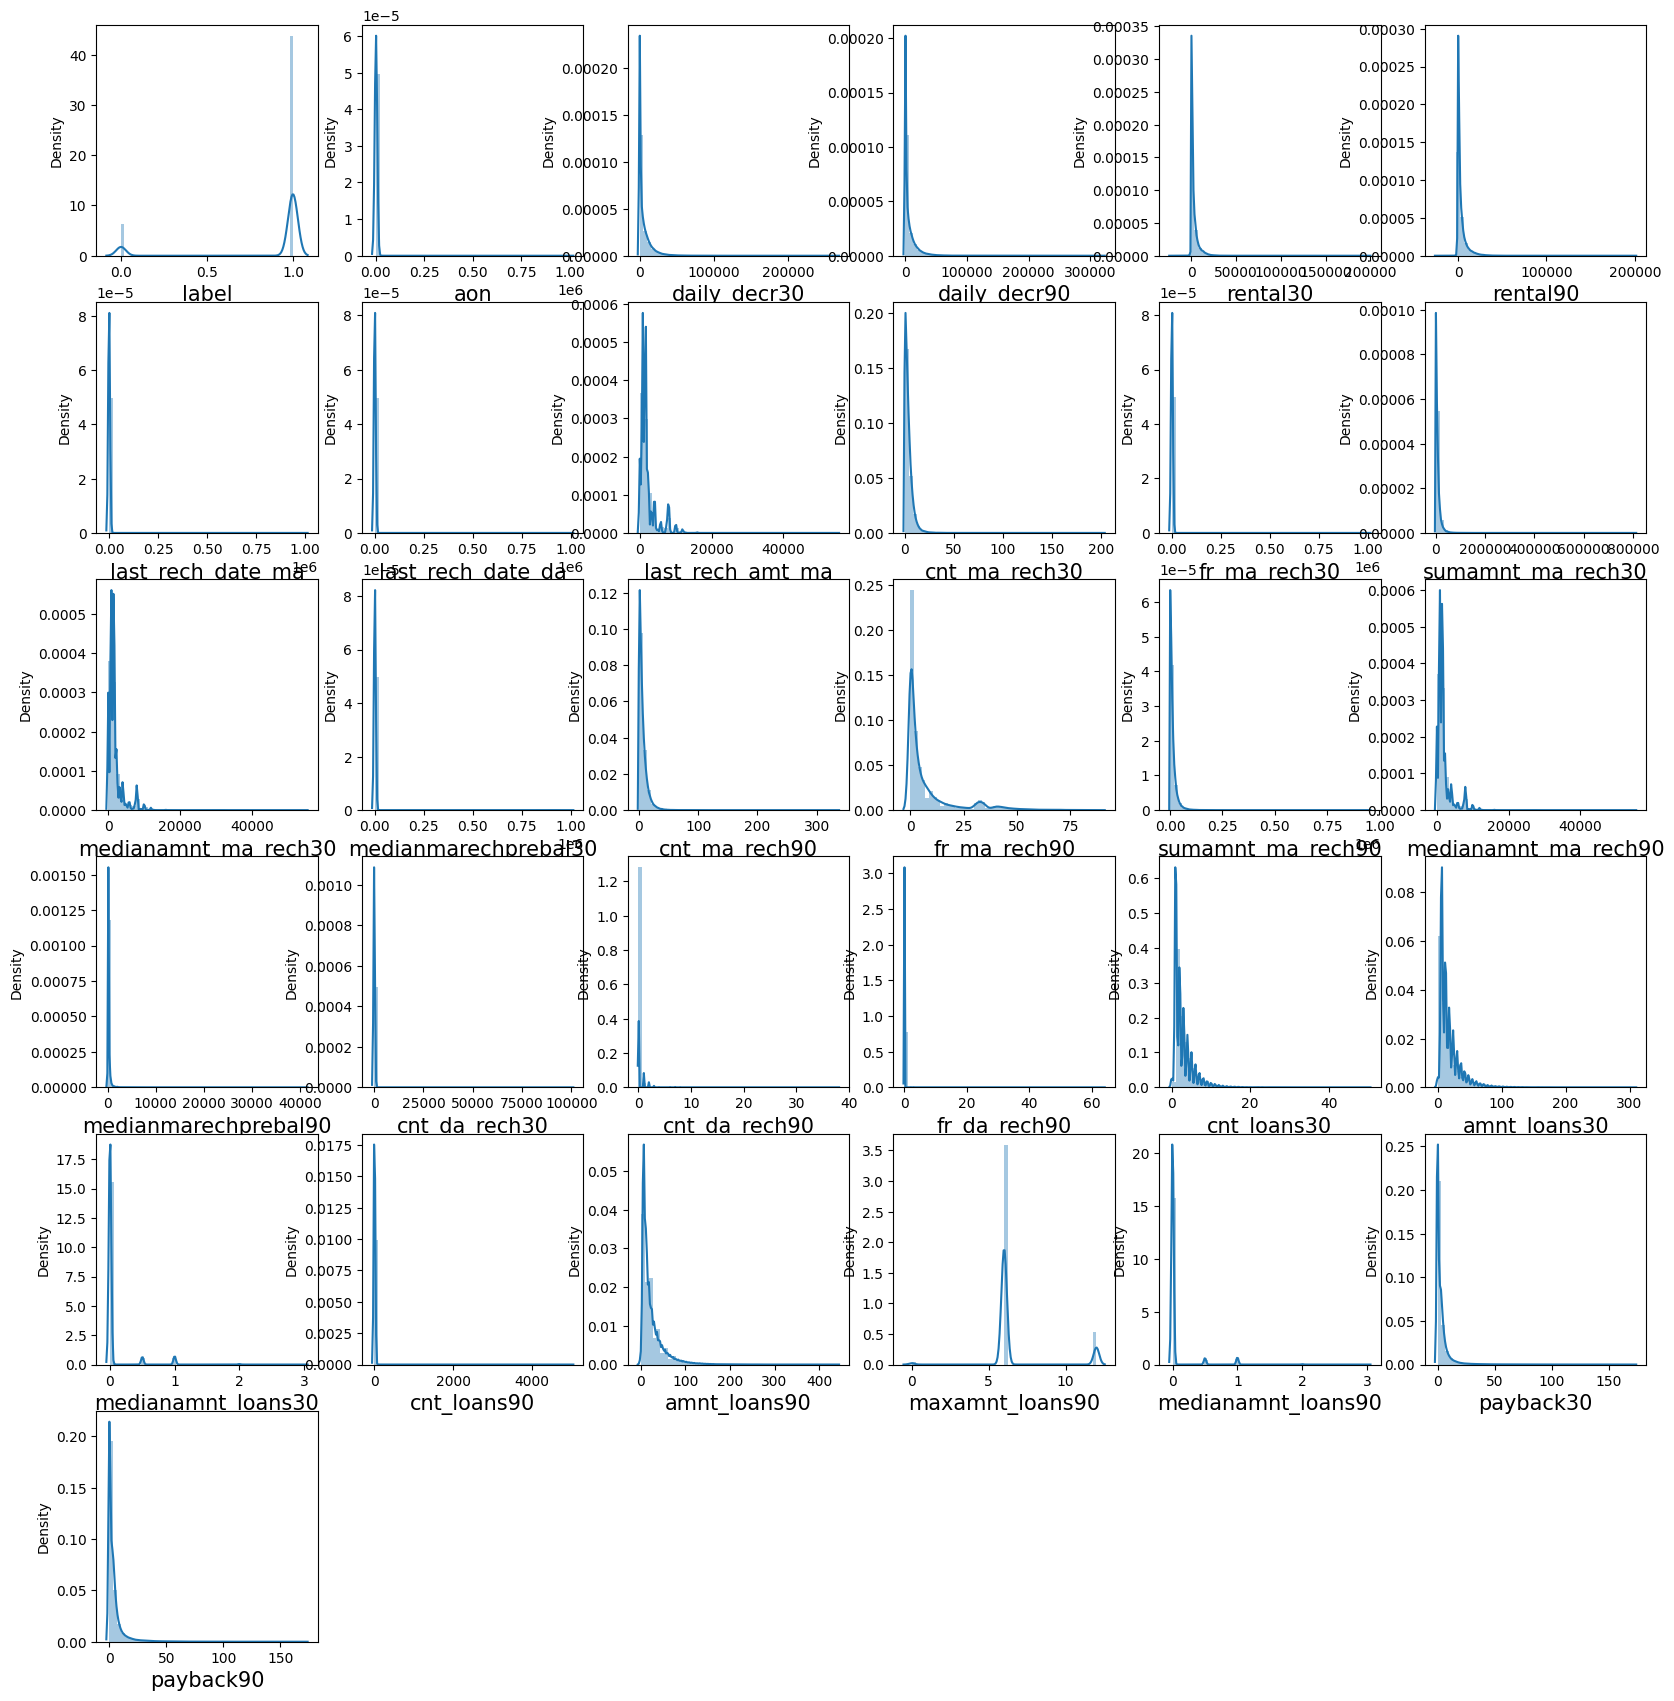

In [51]:
# Visualising data distribution for every column
plt.figure(figsize =(20,21),facecolor ='white')
plotnum = 1

for col in dl:
    if plotnum<=32:
        plt.subplot(6,6,plotnum)
        sns.distplot(dl[col])
        plt.xlabel(col,fontsize = 15)
    plotnum+=1
plt.show()

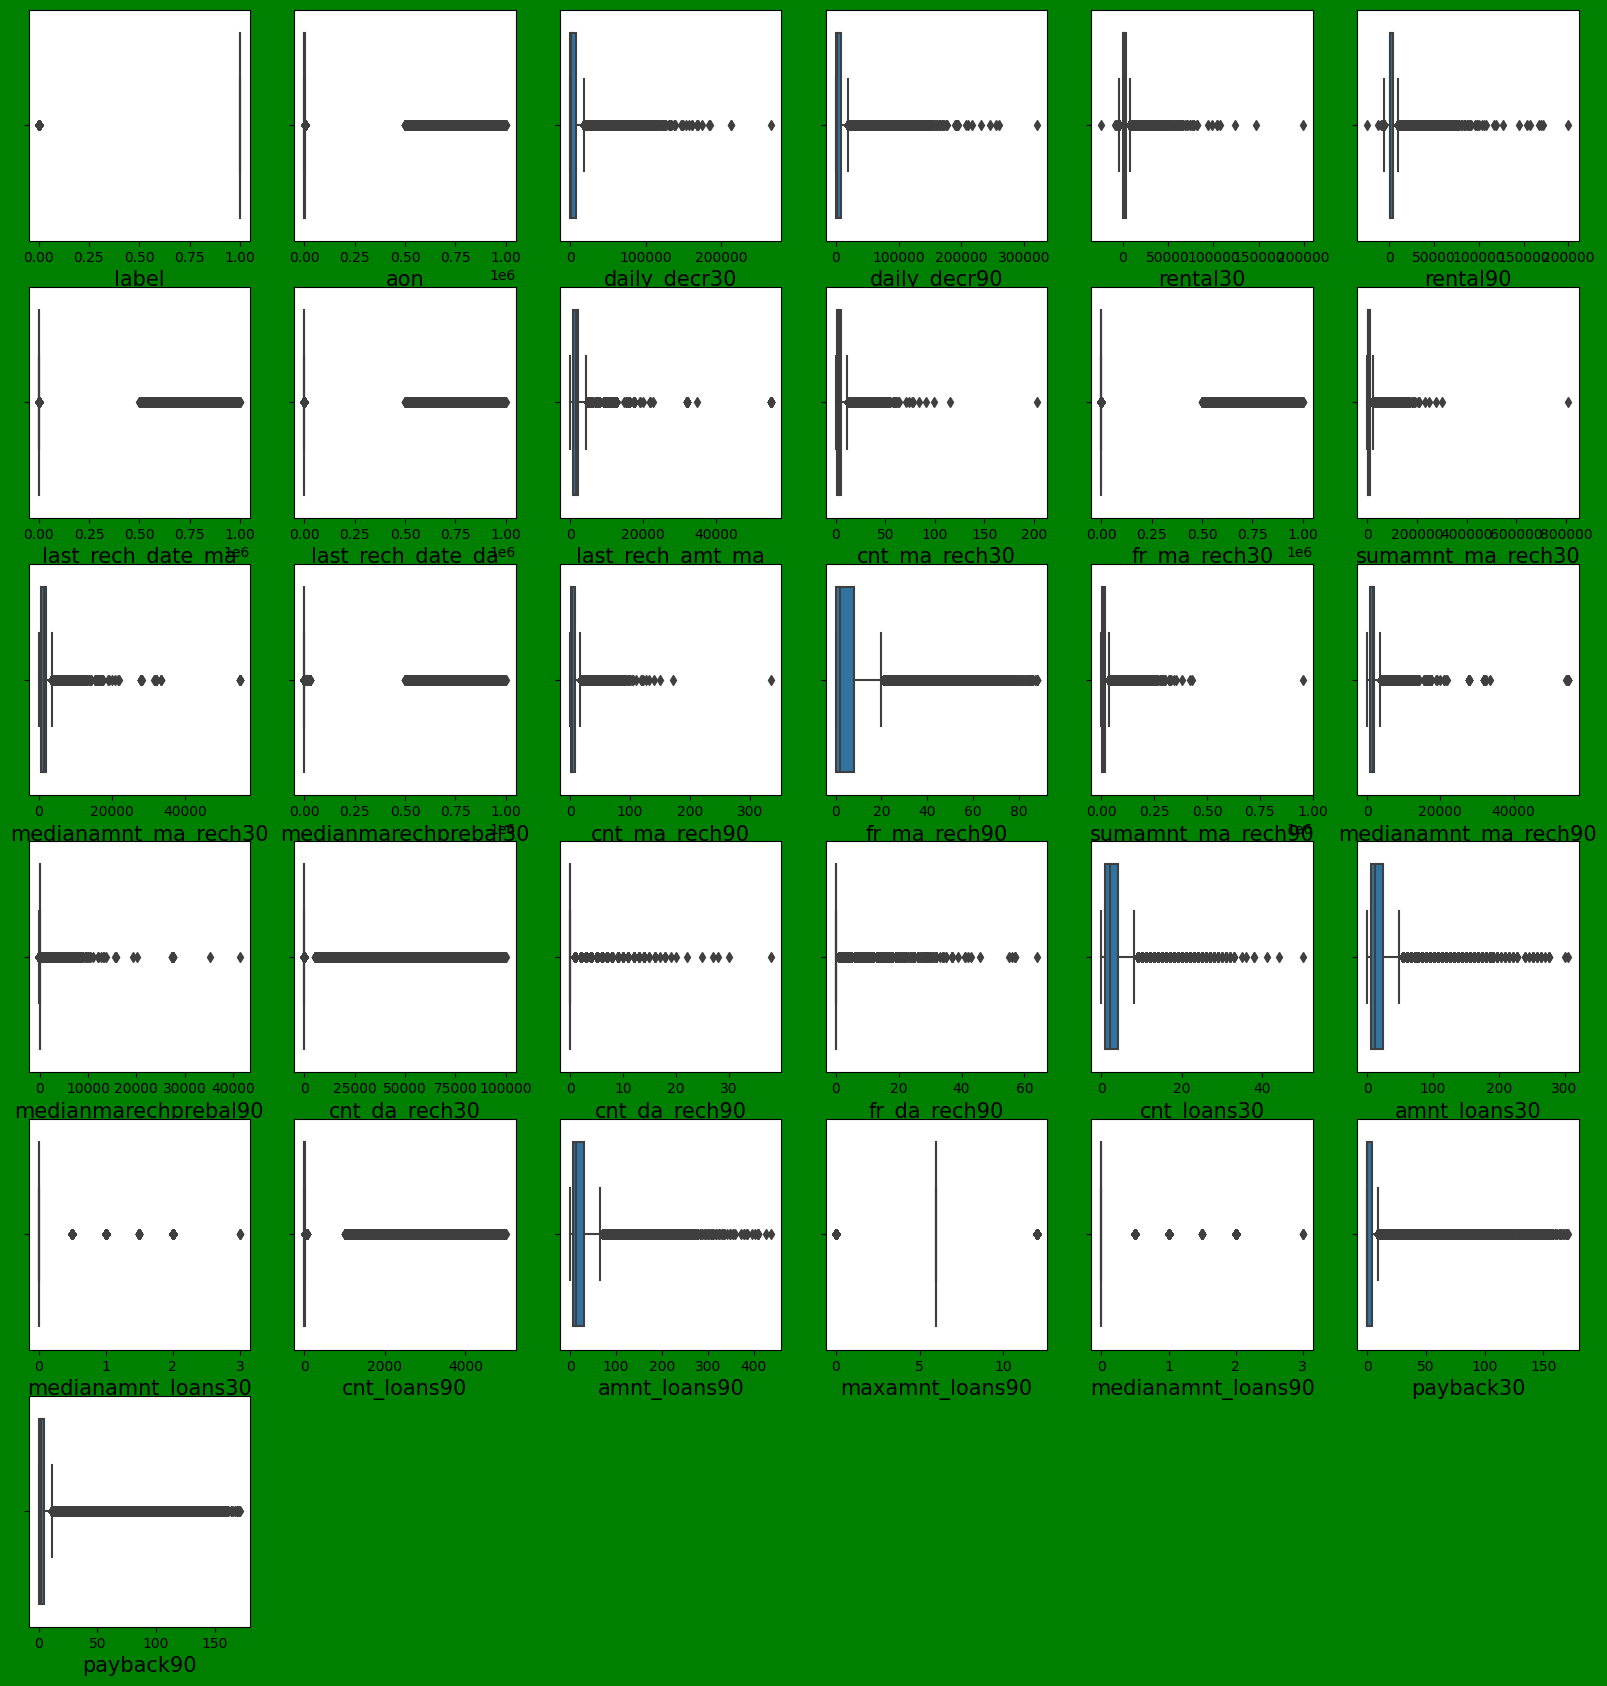

In [52]:
# Visualising data distribution for every column
plt.figure(figsize =(20,21),facecolor ='green')
plotnum = 1

for col in dl:
    if plotnum<=32:
        plt.subplot(6,6,plotnum)
        sns.boxplot(dl[col])
        plt.xlabel(col,fontsize = 15)
    plotnum+=1
plt.show()

In [53]:
numerical_features = ['aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'cnt_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'medianamnt_loans30', 'cnt_loans90','fr_da_rech90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90']
data_num = dl[numerical_features]
data_num.describe()
Q1 = data_num.quantile(0.25)
Q3 = data_num.quantile(0.75)
IQR = Q3-Q1
IQR
((data_num<(Q1-1.5*IQR))|(data_num>(Q3+1.5*IQR))).any()
        

aon                     True
daily_decr30            True
daily_decr90            True
rental30                True
rental90                True
last_rech_date_ma       True
last_rech_date_da       True
last_rech_amt_ma        True
cnt_ma_rech30           True
fr_ma_rech30            True
sumamnt_ma_rech30       True
medianamnt_ma_rech30    True
medianmarechprebal30    True
cnt_ma_rech90           True
fr_ma_rech90            True
sumamnt_ma_rech90       True
medianamnt_ma_rech90    True
medianmarechprebal90    True
cnt_da_rech30           True
cnt_da_rech90           True
cnt_loans30             True
amnt_loans30            True
medianamnt_loans30      True
cnt_loans90             True
fr_da_rech90            True
amnt_loans90            True
maxamnt_loans90         True
medianamnt_loans90      True
payback30               True
payback90               True
dtype: bool

In [54]:
dl.shape

(209593, 31)

In [55]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(dl))
threshold=3
np.where(z>4)

(array([    21,     22,     30, ..., 209580, 209587, 209587]),
 array([15, 15,  6, ..., 12, 24, 28]))

In [56]:
df_new_z=dl[(z<4).all(axis=1)]
df_new_z

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,0,2,12,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,0,1,12,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,0,1,6,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,0,2,12,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,0,7,42,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,0,2,12,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,0,3,18,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,0,4,42,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,0,2,18,0.0,3.0,24,12,0.0,0.000000,10.500000


In [57]:
df_new_z.shape

(178583, 31)

In [58]:
# Checking the dataloss in %

loss = (209593-178583)/209593*100
loss

14.795341447472005

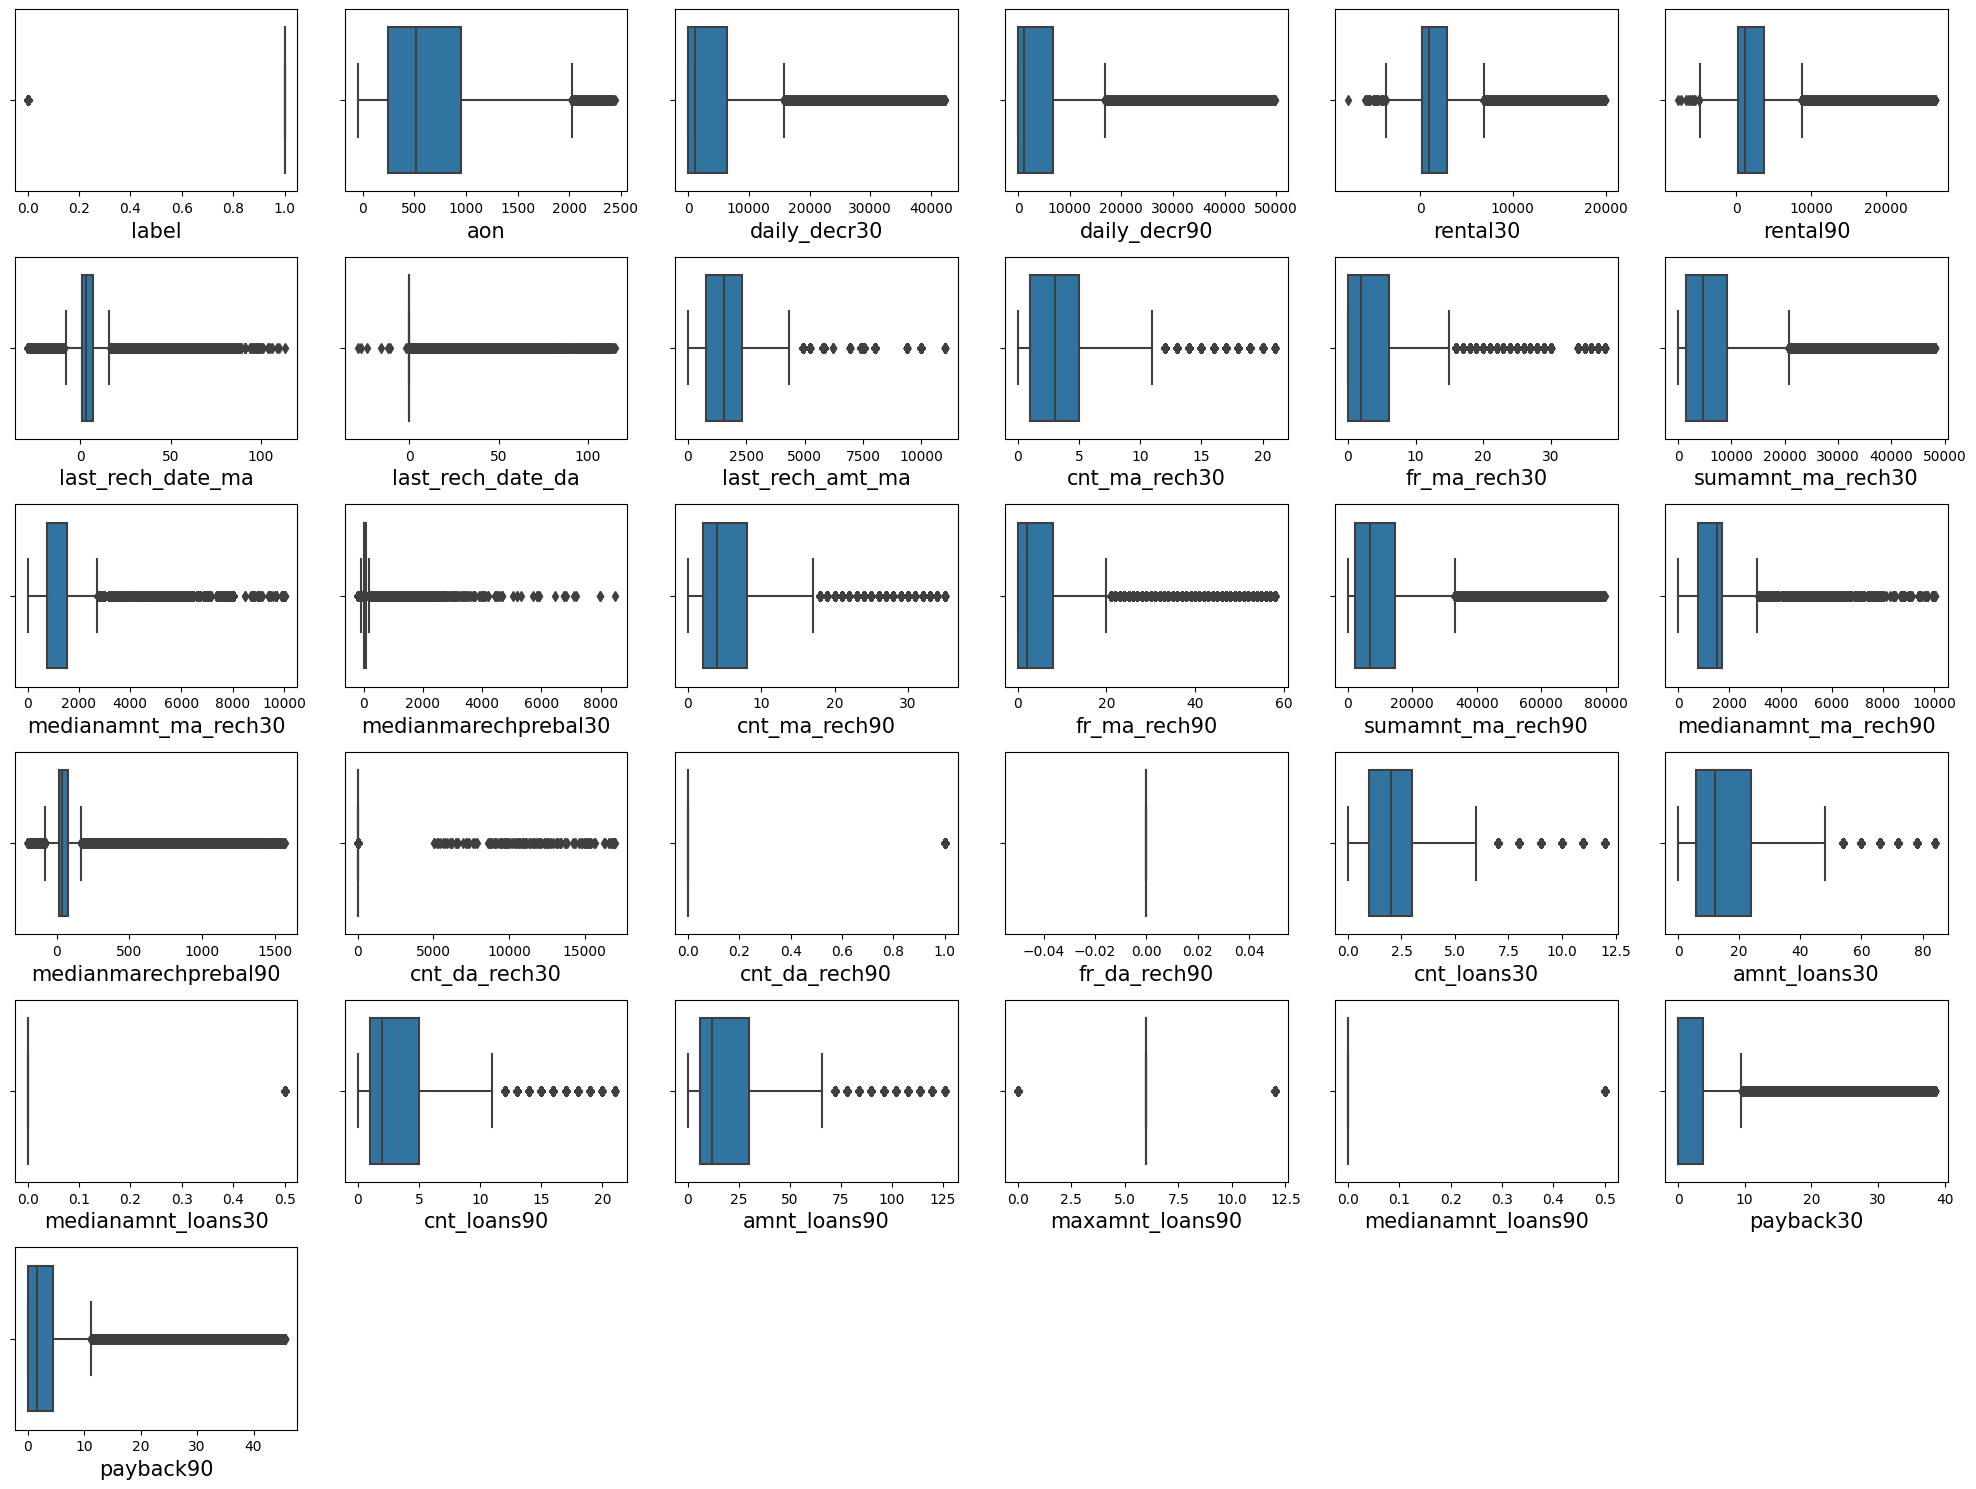

In [59]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in df_new_z.columns:
    if plotnumber <= 31:
        ax = plt.subplot(6, 6, plotnumber)
        sns.boxplot(df_new_z[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [60]:
X = dl.drop("label",axis=1)
Y = dl["label"]

# Feature Scaling

In [61]:
from sklearn.preprocessing import StandardScaler
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

## Fixing imbalanced dataset using Oversampling

In [62]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

1    87.52 %
0    12.48 %
Name: label, dtype: object

In [63]:
from imblearn.over_sampling import RandomOverSampler 

In [64]:
ros = RandomOverSampler(random_state=42)

In [65]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [66]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [67]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: label, dtype: object

# Creating Train and test data

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [69]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (293489, 30)
X_test shape: (73373, 30)
Y_train shape: (293489,)
Y_test shape: (73373,)


# Data Modeling

### 1.. Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [71]:
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [72]:
Y_pred_log_reg = log_reg.predict(X_test)

### 2...KNN classifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [74]:
Y_pred_knn = knn.predict(X_test)

### 3...Random Forest Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)
ran_for.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [76]:
Y_pred_ran_for = ran_for.predict(X_test)

## Model Evaluation

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [78]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 75.61
F1 score: 74.18


In [79]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 87.56
F1 score: 86.26


In [80]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 97.83
F1 score: 97.8


### we can see that all model are well trained..but Random Forest Classifier gives higest Accuracy= 97.83 and F1 score is also good=97.8 .so we select this model for hyperparameter tuning,,

## Hyperparameter Tuning

In [81]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(X) for X in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(X) for X in np.linspace(40, 150, num=15)]

In [82]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [83]:
rf_tuned = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)
rf_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [84]:
rf_cv.best_score_

0.9731676484726777

In [85]:
rf_cv.best_params_

{'n_estimators': 142, 'max_depth': 110}

In [86]:
rf_best = RandomForestClassifier(
    max_depth=110, n_estimators=142, random_state=42)

In [87]:
rf_best.fit(X_train, Y_train)

RandomForestClassifier(max_depth=110, n_estimators=142, random_state=42)

In [88]:
Y_pred_rf_best = rf_best.predict(X_test)

In [89]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 97.87
F1 score: 97.84


## confusion Matrix

In [90]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf_best)

In [91]:
cm

array([[36401,    46],
       [ 1515, 35411]])

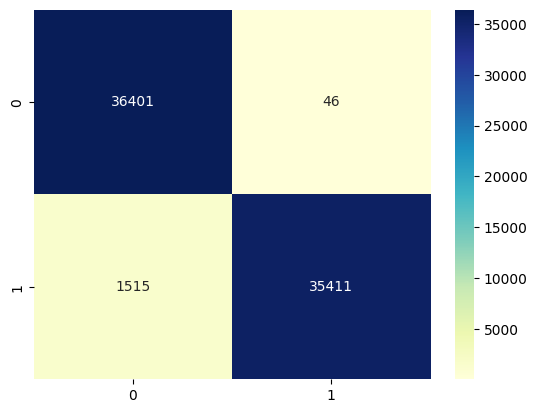

In [92]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [93]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     36447
           1       1.00      0.96      0.98     36926

    accuracy                           0.98     73373
   macro avg       0.98      0.98      0.98     73373
weighted avg       0.98      0.98      0.98     73373



### Random Forest Classifier is the best model for the dataset...

# ROC AUC Curves

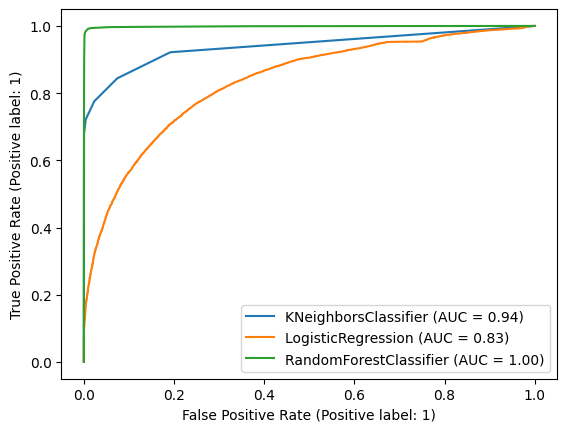

In [96]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(knn,X_test,Y_test)
mod = [log_reg,ran_for]

for i in mod:
    plot_roc_curve(i,X_test,Y_test, ax=disp.ax_)
plt.legend(prop = {'size':10}, loc = 'lower right')
plt.show()

## above graph says, Random Forest Classifier is the best model for the dataset with AUC score 1.00. this gives 100% result.

In [97]:
import joblib
joblib.dump(rf_best,"Best_data.pkl")

['Best_data.pkl']

In [98]:
mod = joblib.load("Best_data.pkl")
print(mod.predict(X_test))

[0 0 1 ... 1 0 0]


In [99]:
# Predicting some of the X_test results and matching it with true i.e. y_test values using Random Forest.

a = np.array(Y_test)
predicted = np.array(mod.predict(X_test))
data_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
data_con

,orginal,predicted
0,0,0
1,1,0
2,1,1
3,1,1
4,0,0
...,...,...
73368,1,1
73369,0,0
73370,1,1
73371,0,0



# This is very good model . my prediction and actual data are same with high accuracy..